## 数据预处理

In [1]:
# -*- coding: UTF-8 -*-

"""
@author: wty-yy
@software: Jupyter
@file: prepare.py
@time: 2022/11/14 15:03
"""

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import collections
import re
from tqdm import tqdm
from nltk import word_tokenize  # 分词
from nltk.corpus import stopwords  # 停用词
from nltk.stem.porter import PorterStemmer  # 使用Porter词干提取方法
from nltk.stem import WordNetLemmatizer  # 词性还原

config = {
    "font.family": 'serif', # 衬线字体
    "figure.figsize": (14, 6),  # 图像大小
    "font.size": 20, # 字号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # 渲染数学公式字体
    'axes.unicode_minus': False # 显示负号
}
plt.rcParams.update(config)

In [2]:
def extractWords(words):  # 提取分词
    words = words.lower()
    words = word_tokenize(words)  # 分词
    dropWords = ["n't"]  # 这个是计算结果中出现次数第一的，但明显不重要
    words = [word for word in words if re.match(r'[A-Za-z]', word) and word not in dropWords]  # 保证单词中必须包含字母
    stops = set(stopwords.words('english'))
    words = [word for word in words if word not in stops]
    tmp = []  # 词干提取+还原词性
    for word in words:
        stem = PorterStemmer().stem(word)  # 词干提取
        pos = ['n', 'v', 'a', 'r', 's']  # 名词，动词，形容词，副词，附属形容词
        for p in pos:
            stem = WordNetLemmatizer().lemmatize(stem, pos=p)
        tmp.append(stem)  # 还原词性，附属形容词
    words = tmp
    return words

def initDataset(fname, showInfo=True):
    path = Path(fname)  # 将路径转化为Path类
    folds = [f.name for f in path.iterdir() if f.is_dir()]  # 获取文件夹名称
    allwords, words, fileNum, counter = [[] for _ in range(20)], [[] for _ in range(20)], [], []
    for id, fold in enumerate(folds):  # 一共有20个文件夹，分别对其内部文件进行处理
        print(f'处理第{id+1}/{len(folds)}个文件夹{fold}中...')
        now = path.joinpath(fold)
        files = [f.name for f in now.iterdir() if f.is_file()]  # 获取当前文件夹内的文件名
        for file in tqdm(files):  # 获取文件文件名
            pathFile = now.joinpath(file)
            with open(pathFile, errors='replace') as f:  # 打开文件进行处理
                s = f.readline()
                while s != "\n":  # 先找到第一个换行符，下面则是正文
                    s = f.readline()
                text = f.read()
            allwords[id] += extractWords(text)
            words[id].append(extractWords(text))
        fileNum.append(len(files))  # 记录文件数目
        counter.append(collections.Counter(allwords[id]))  # 统计词频
        
    totalCounter = collections.Counter([w for word in allwords for w in word])
    if showInfo:
        print(f'{"Class":>25} {"Id":>5} {"Files":>8} {"Words":>8}  {"Most common words"}')  # 显示文件相关信息
        for i, fold in enumerate(folds):
            print(f'{fold:>25}:{i:>5} {fileNum[i]:>8} {len(counter[i]):>8}  {[t[0] for t in counter[i].most_common(5)]}')
        print(f'{"":>25} {"":>5} {sum(fileNum):>8} {len(totalCounter):>8}  {[t[0] for t in totalCounter.most_common(5)]}')
    
    return words, totalCounter


In [3]:
# 测试下词性转化功能
print(WordNetLemmatizer().lemmatize('get', pos='v'), WordNetLemmatizer().lemmatize('got', pos='v'), WordNetLemmatizer().lemmatize('gotten', pos='v'))
print(WordNetLemmatizer().lemmatize('dog', pos='n'), WordNetLemmatizer().lemmatize('dogs', pos='n'))

get get get
dog dog


In [4]:
words, totalCounter = initDataset(r'D:\yy\program\NLP\hw2\20_newsgroups')  # 此处设置为数据集位置

处理第1/20个文件夹alt.atheism中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.22it/s]


处理第2/20个文件夹comp.graphics中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.58it/s]


处理第3/20个文件夹comp.os.ms-windows.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.88it/s]


处理第4/20个文件夹comp.sys.ibm.pc.hardware中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.05it/s]


处理第5/20个文件夹comp.sys.mac.hardware中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.50it/s]


处理第6/20个文件夹comp.windows.x中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.07it/s]


处理第7/20个文件夹misc.forsale中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.73it/s]


处理第8/20个文件夹rec.autos中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.81it/s]


处理第9/20个文件夹rec.motorcycles中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 62.11it/s]


处理第10/20个文件夹rec.sport.baseball中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.11it/s]


处理第11/20个文件夹rec.sport.hockey中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.26it/s]


处理第12/20个文件夹sci.crypt中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.38it/s]


处理第13/20个文件夹sci.electronics中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.64it/s]


处理第14/20个文件夹sci.med中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.06it/s]


处理第15/20个文件夹sci.space中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.68it/s]


处理第16/20个文件夹soc.religion.christian中...


100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [00:23<00:00, 42.10it/s]


处理第17/20个文件夹talk.politics.guns中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.23it/s]


处理第18/20个文件夹talk.politics.mideast中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.37it/s]


处理第19/20个文件夹talk.politics.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.98it/s]


处理第20/20个文件夹talk.religion.misc中...


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.85it/s]


                    Class    Id    Files    Words  Most common words
              alt.atheism:    0     1000    10950  ['write', 'say', 'one', 'god', 'would']
            comp.graphics:    1     1000    13406  ['imag', 'file', 'use', 'program', 'write']
  comp.os.ms-windows.misc:    2     1000    48850  ['max', 'g', 'r', 'q', 'p']
 comp.sys.ibm.pc.hardware:    3     1000    10353  ['drive', 'use', 'get', 'card', 'scsi']
    comp.sys.mac.hardware:    4     1000     9354  ['use', 'mac', 'get', 'write', 'appl']
           comp.windows.x:    5     1000    20392  ['x', 'use', 'window', 'file', 'program']
             misc.forsale:    6     1000    10830  ['new', 'sale', 'offer', 'use', 'sell']
                rec.autos:    7     1000    10378  ['car', 'write', 'get', 'articl', 'would']
          rec.motorcycles:    8     1000    10207  ['write', 'bike', 'get', 'articl', 'dod']
       rec.sport.baseball:    9     1000     9164  ['game', 'year', 'write', 'good', 'get']
         rec.sport.hoc

```
                    Class  Id Files  Words  Most common words
              alt.atheism:  0  1000  10950  ['write', 'say', 'one', 'god', 'would']
            comp.graphics:  1  1000  13406  ['imag', 'file', 'use', 'program', 'write']
  comp.os.ms-windows.misc:  2  1000  48850  ['max', 'g', 'r', 'q', 'p']
 comp.sys.ibm.pc.hardware:  3  1000  10353  ['drive', 'use', 'get', 'card', 'scsi']
    comp.sys.mac.hardware:  4  1000   9354  ['use', 'mac', 'get', 'write', 'appl']
           comp.windows.x:  5  1000  20392  ['x', 'use', 'window', 'file', 'program']
             misc.forsale:  6  1000  10830  ['new', 'sale', 'offer', 'use', 'sell']
                rec.autos:  7  1000  10378  ['car', 'write', 'get', 'articl', 'would']
          rec.motorcycles:  8  1000  10207  ['write', 'bike', 'get', 'articl', 'dod']
       rec.sport.baseball:  9  1000   9164  ['game', 'year', 'write', 'good', 'get']
         rec.sport.hockey: 10  1000  11311  ['game', 'team', 'play', 'go', 'get']
                sci.crypt: 11  1000  13087  ['key', 'use', 'encrypt', 'would', 'write']
          sci.electronics: 12  1000  10480  ['use', 'one', 'would', 'write', 'get']
                  sci.med: 13  1000  15271  ['use', 'one', 'write', 'get', 'articl']
                sci.space: 14  1000  13867  ['space', 'would', 'write', 'orbit', 'one']
   soc.religion.christian: 15   997  12616  ['god', 'christian', 'one', 'would', 'say']
       talk.politics.guns: 16  1000  14626  ['gun', 'would', 'write', 'peopl', 'articl']
    talk.politics.mideast: 17  1000  15105  ['armenian', 'say', 'peopl', 'one', 'write']
       talk.politics.misc: 18  1000  13727  ['would', 'write', 'peopl', 'say', 'articl']
       talk.religion.misc: 19  1000  12390  ['write', 'say', 'one', 'god', 'would']
                              19997 146437  ['write', 'would', 'one', 'use', 'get']
```

## K近邻

选取前1000个单词作为词向量的维度. `word2num[]` 将单词映射为数字，`num2word[]` 为其逆映射，将数字映射为单词.

In [5]:
N = 1000
value = list(totalCounter.values())
keyword = totalCounter.most_common(1000)

In [6]:
# 选择基底
word2num, num2word = {}, {}
for i, word in enumerate(keyword):
    word2num[word[0]] = i
    num2word[i] = word
    print(word[0], end=', ')

write, would, one, use, get, articl, say, know, like, think, make, peopl, good, go, time, x, see, also, could, work, u, take, right, new, want, system, even, way, year, thing, come, well, find, may, give, look, need, god, problem, much, mani, tri, first, two, file, mean, max, believ, call, run, question, point, q, anyon, post, seem, program, state, window, tell, differ, r, drive, read, realli, someth, plea, includ, g, sinc, thank, number, p, ca, back, univers, still, govern, reason, help, inform, day, start, person, game, gener, part, follow, might, support, c, law, sure, last, long, ask, case, fact, never, do, let, interest, set, christian, must, without, possibl, hear, group, comput, power, anoth, someon, car, avail, lot, n, b, name, show, put, keep, key, imag, line, great, exist, chang, live, send, actual, word, world, control, place, claim, high, list, happen, probabl, anyth, etc, data, howev, around, book, w, littl, opinion, v, everi, bite, card, kill, true, consid, least, cours, 

### 构建词向量

归一化到半径为100的球上

In [7]:
def word2vector(word):  # 通过文档生成词向量，且向量的模长为100，由于有1000维，单位化每一维值太小
    x = np.ones(N)
    for t in w:
        if t in word2num:
            x[word2num[t]] += 1
    x /= x.sum() / 100
    return x
    
data = []  # (词向量, 类别)  共有19997个词向量
for i in range(20):
    for w in words[i]:
        x = word2vector(w)
        data.append((x, i))

In [8]:
# 读入测试集
test_words, _ = initDataset(r'D:\yy\program\NLP\hw2\mini_newsgroups')  # 此处设置为数据集位置

处理第1/20个文件夹alt.atheism中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 52.30it/s]


处理第2/20个文件夹comp.graphics中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.09it/s]


处理第3/20个文件夹comp.os.ms-windows.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.28it/s]


处理第4/20个文件夹comp.sys.ibm.pc.hardware中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.39it/s]


处理第5/20个文件夹comp.sys.mac.hardware中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.39it/s]


处理第6/20个文件夹comp.windows.x中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.65it/s]


处理第7/20个文件夹misc.forsale中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 75.71it/s]


处理第8/20个文件夹rec.autos中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.48it/s]


处理第9/20个文件夹rec.motorcycles中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 62.68it/s]


处理第10/20个文件夹rec.sport.baseball中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 57.99it/s]


处理第11/20个文件夹rec.sport.hockey中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 55.66it/s]


处理第12/20个文件夹sci.crypt中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 49.32it/s]


处理第13/20个文件夹sci.electronics中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.13it/s]


处理第14/20个文件夹sci.med中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.28it/s]


处理第15/20个文件夹sci.space中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.20it/s]


处理第16/20个文件夹soc.religion.christian中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.08it/s]


处理第17/20个文件夹talk.politics.guns中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 48.06it/s]


处理第18/20个文件夹talk.politics.mideast中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.58it/s]


处理第19/20个文件夹talk.politics.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.40it/s]


处理第20/20个文件夹talk.religion.misc中...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 50.76it/s]

                    Class    Id    Files    Words  Most common words
              alt.atheism:    0      100     3096  ['write', 'say', 'articl', 'one', 'make']
            comp.graphics:    1      100     5273  ['imag', 'file', 'use', 'jpeg', 'format']
  comp.os.ms-windows.misc:    2      100     5038  ['p', 'r', 'g', 'window', 'w']
 comp.sys.ibm.pc.hardware:    3      100     2567  ['use', 'drive', 'would', 'one', 'work']
    comp.sys.mac.hardware:    4      100     2660  ['drive', 'problem', 'use', 'get', 'mac']
           comp.windows.x:    5      100     3715  ['x', 'window', 'use', 'entri', 'program']
             misc.forsale:    6      100     2669  ['new', 'plea', 'work', 'use', 'sale']
                rec.autos:    7      100     3177  ['car', 'write', 'get', 'one', 'like']
          rec.motorcycles:    8      100     3218  ['write', 'bike', 'articl', 'get', 'would']
       rec.sport.baseball:    9      100     2889  ['year', 'write', 'game', 'good', 'get']
         rec.spor

In [9]:
# KNN算法
def KNN(word, K=[4]):
    now = word2vector(word)  # 获得当前文档的词向量
    dist = []
    for x, y in data:
        dist.append((np.linalg.norm(now - x), y))  # 计算欧氏距离
    dist = sorted(dist, key=(lambda x: x[0]))  # 递增排序
    ret = []
    for k in K:
        tmp = dist[1:k+1]  # 获得前k个，由于原数据集包含当前数据，第0个必然是自身，所以跳过第0个
        classify = [c[1] for c in tmp]
        ret.append(collections.Counter(classify).most_common()[0][0])  # 找到出现次数最多的类别作为预测值
    return np.array(ret)

In [10]:
# 计算不同的K对应的正确率
K = [1,2,3,4,5,6,7,8,9,10, 20, 50, 100]
rate = [np.zeros_like(K).astype('float') for _ in range(20)]
for i in range(20):
    print(f'计算第{i+1}/{20}组')
    for w in tqdm(test_words[i]):
        rate[i] += (KNN(w, K) == i)
    rate[i] /= len(test_words[i])

计算第1/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.75it/s]


计算第2/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.77it/s]


计算第3/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.78it/s]


计算第4/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.74it/s]


计算第5/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.78it/s]


计算第6/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.71it/s]


计算第7/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.84it/s]


计算第8/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.82it/s]


计算第9/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.76it/s]


计算第10/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.77it/s]


计算第11/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.76it/s]


计算第12/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.78it/s]


计算第13/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.79it/s]


计算第14/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.84it/s]


计算第15/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.79it/s]


计算第16/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.79it/s]


计算第17/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.79it/s]


计算第18/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.77it/s]


计算第19/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.82it/s]


计算第20/20组


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.82it/s]


K=1, 正确率: 58.00%
K=2, 正确率: 58.00%
K=3, 正确率: 56.40%
K=4, 正确率: 55.85%
K=5, 正确率: 54.10%
K=6, 正确率: 52.50%
K=7, 正确率: 51.60%
K=8, 正确率: 50.30%
K=9, 正确率: 48.75%
K=10, 正确率: 48.20%
K=20, 正确率: 42.70%
K=50, 正确率: 37.25%
K=100, 正确率: 33.55%


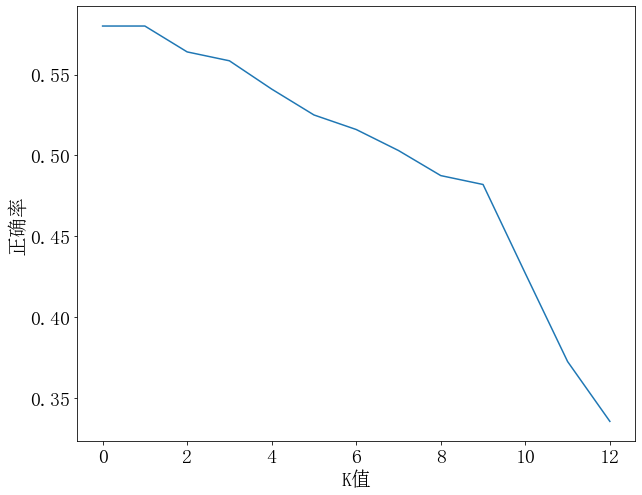

In [11]:
# 选取正确率均值最高的K
rateMean = np.mean(rate, axis=0)
for k, r in zip(K, rateMean.tolist()):
    print(f'K={k}, 正确率: {r:.2%}')
plt.figure(figsize=(10,8))
plt.plot(rateMean)
plt.xlabel('K值')
plt.ylabel('正确率')
plt.show()

In [12]:
# 这里K不能选取过小，否则容易过拟合
bestK = 4
print(f'K为{bestK}时，平均正确率较高{np.mean(rate, axis=0)[bestK-1]:.2%}')
for i in range(20):
    print(f'第{i+1:>3} 组类别，正确率: {rate[i][bestK]:.2f}')

K为4时，平均正确率较高55.85%
第  1 组类别，正确率: 0.43
第  2 组类别，正确率: 0.55
第  3 组类别，正确率: 0.51
第  4 组类别，正确率: 0.38
第  5 组类别，正确率: 0.56
第  6 组类别，正确率: 0.44
第  7 组类别，正确率: 0.42
第  8 组类别，正确率: 0.46
第  9 组类别，正确率: 0.67
第 10 组类别，正确率: 0.57
第 11 组类别，正确率: 0.70
第 12 组类别，正确率: 0.62
第 13 组类别，正确率: 0.51
第 14 组类别，正确率: 0.57
第 15 组类别，正确率: 0.57
第 16 组类别，正确率: 0.50
第 17 组类别，正确率: 0.56
第 18 组类别，正确率: 0.72
第 19 组类别，正确率: 0.43
第 20 组类别，正确率: 0.65


## 前馈神经网络

构建测试集与训练集

In [13]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [14]:
train_x, train_y = [], []
test_x, test_y = [], []
tmp = [w for words in test_words for w  in words]
cnt = 0
for i in range(20):
    for w in test_words[i]:  # 测试集
        x = word2vector(w)
        test_x.append(x)
        test_y.append(i)
    for w in words[i]:  # 训练集
        if w not in tmp:  # 训练集元素不能在测试集中出现
            x = word2vector(w)
            train_x.append(x)
            train_y.append(i)
        else:
            cnt += 1
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
print(f'训练集大小{train_x.shape}, 测试集大小{test_y.shape}')

训练集大小(17835, 1000), 测试集大小(2000,)


In [15]:
# 构建为tf.data.Dataset数据类型
train = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train = train.shuffle(10000).batch(16).repeat(5)  # 随机打乱，batch大小为16，重复5次，即每次训练17835*5=89175个数据
test = tf.data.Dataset.from_tensor_slices((test_x, test_y))

In [19]:
model = keras.Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=[N,]),
    layers.Dense(20, activation='softmax')
])
model.compile(optimizer='adam',
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
history = model.fit(train, epochs=20, validation_data=(test_x, test_y))

Epoch 1/20
5575/5575 [==============================] - 17s 3ms/step - loss: 2.4335 - accuracy: 0.3088 - val_loss: 2.0189 - val_accuracy: 0.4575
Epoch 2/20
5575/5575 [==============================] - 17s 3ms/step - loss: 1.6478 - accuracy: 0.5651 - val_loss: 1.5178 - val_accuracy: 0.5825
Epoch 3/20
5575/5575 [==============================] - 18s 3ms/step - loss: 1.3092 - accuracy: 0.6414 - val_loss: 1.3304 - val_accuracy: 0.6200
Epoch 4/20
5575/5575 [==============================] - 17s 3ms/step - loss: 1.1342 - accuracy: 0.6790 - val_loss: 1.2019 - val_accuracy: 0.6455
Epoch 5/20
5575/5575 [==============================] - 17s 3ms/step - loss: 1.0267 - accuracy: 0.7025 - val_loss: 1.1200 - val_accuracy: 0.6610
Epoch 6/20
5575/5575 [==============================] - 17s 3ms/step - loss: 0.9517 - accuracy: 0.7212 - val_loss: 1.0974 - val_accuracy: 0.6565
Epoch 7/20
5575/5575 [==============================] - 19s 3ms/step - loss: 0.8952 - accuracy: 0.7344 - val_loss: 1.0440 - val_ac

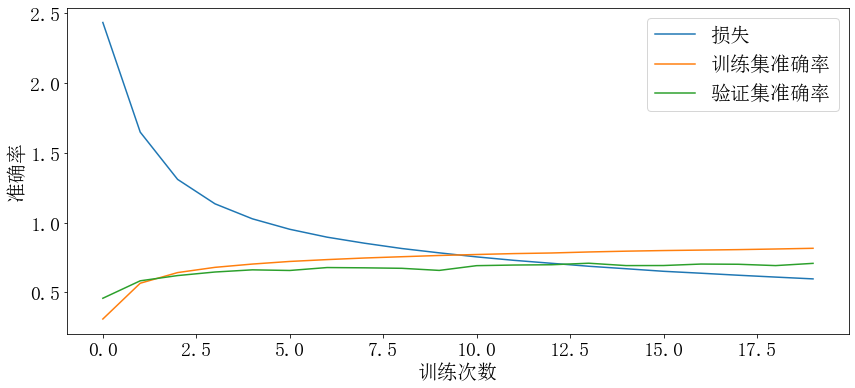

In [20]:
# plt.figure(figsize=(10, 5))
labels = ['loss', 'accuracy', 'val_accuracy']
name = ['损失', '训练集准确率', '验证集准确率']
for i, l in enumerate(labels):
    plt.plot(history.history[l], label=name[i])
plt.xlabel('训练次数')
plt.ylabel('准确率')
plt.legend()
plt.show()

In [21]:
pred = model.predict(test_x)
print(f'验证集上最终的准确率: {np.sum(np.argmax(pred, axis=1) == test_y) / np.size(test_y)}')

验证集上最终的准确率: 0.7075
